# IMPORT LIB AND DATASET

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from glob import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

In [2]:
csv_files = glob("zippedData\*.csv.gz") 
csv_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [3]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv.gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df
    
csv_files_dict

{'bom_movie_gross':                                                  studio  domestic_gross  \
 title                                                                     
 Toy Story 3                                          BV     415000000.0   
 Alice in Wonderland (2010)                           BV     334200000.0   
 Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
 Inception                                            WB     292600000.0   
 Shrek Forever After                                P/DW     238700000.0   
 ...                                                 ...             ...   
 The Quake                                         Magn.          6200.0   
 Edward II (2018 re-release)                          FM          4800.0   
 El Pacto                                           Sony          2500.0   
 The Swan                                     Synergetic          2400.0   
 An Actor Prepares                                 Grav.          170

In [4]:
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

In [5]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)
    

In [6]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table imdb_name_basics
Table 'imdb_name_basics' already exists.
could not make table imdb_title_akas
Table 'imdb_title_akas' already exists.
could not make table imdb_title_basics
Table 'imdb_title_basics' already exists.
could not make table imdb_title_crew
Table 'imdb_title_crew' already exists.
could not make table imdb_title_principals
Table 'imdb_title_principals' already exists.
could not make table imdb_title_ratings
Table 'imdb_title_ratings' already exists.
could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.


# Combine All Datasets Needed

In [7]:
cur.execute("""select * 
                from tn_movie_budgets t
                join imdb_title_basics i
                on t.movie = i.primary_title
                join imdb_title_ratings r
                using(tconst);""")
joined_three_df = pd.DataFrame(cur.fetchall())
joined_three_df.columns = [x[0] for x in cur.description]
joined_three_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
1,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24
2,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
3,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
4,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116
5,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
6,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787
7,4,"Apr 13, 2012",The Three Stooges,"$30,000,000","$44,338,224","$54,052,249",tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570
8,65,"Dec 31, 2010",Anderson's Cross,"$300,000",$0,$0,tt0393049,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106
9,15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240",tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366


In [8]:
joined_three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2875 non-null   int64  
 1   release_date       2875 non-null   object 
 2   movie              2875 non-null   object 
 3   production_budget  2875 non-null   object 
 4   domestic_gross     2875 non-null   object 
 5   worldwide_gross    2875 non-null   object 
 6   tconst             2875 non-null   object 
 7   primary_title      2875 non-null   object 
 8   original_title     2875 non-null   object 
 9   start_year         2875 non-null   int64  
 10  runtime_minutes    2757 non-null   float64
 11  genres             2867 non-null   object 
 12  averagerating      2875 non-null   float64
 13  numvotes           2875 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 314.6+ KB


In [10]:
#check for missing data
joined_three_df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      118
genres                 8
averagerating          0
numvotes               0
dtype: int64

# Clean The Data

In [11]:
#drop any columns I'm not working with
joined_three_df.drop(['id', 'tconst', 'primary_title', 'original_title', 
                      'start_year'], axis = 1, inplace = True)
print('After removing unused columns (Rows, Columns) : ', joined_three_df.shape)

After removing unused columns (Rows, Columns) :  (2875, 9)


In [12]:
joined_three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2875 non-null   object 
 1   movie              2875 non-null   object 
 2   production_budget  2875 non-null   object 
 3   domestic_gross     2875 non-null   object 
 4   worldwide_gross    2875 non-null   object 
 5   runtime_minutes    2757 non-null   float64
 6   genres             2867 non-null   object 
 7   averagerating      2875 non-null   float64
 8   numvotes           2875 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 202.3+ KB


In [13]:
# create a function to change a column to an integer
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [14]:
# convert all the columns to integer
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    joined_three_df = convert_col_to_int(joined_three_df, col)

In [15]:
# add a column for the profits from movies
joined_three_df['profits'] = joined_three_df['worldwide_gross'] - joined_three_df['production_budget']

In [16]:
# make a column for return of investment by movie
joined_three_df['roi'] = (((joined_three_df['profits'] - joined_three_df['production_budget']) 
                                / joined_three_df['production_budget']) * 100).round()


In [17]:
# Change release date to date time format
# extract the month number from release date and apply the month's abbreviated name
joined_three_df['release_date'] = pd.to_datetime(joined_three_df['release_date'])
release_month = joined_three_df['release_date'].dt.month
joined_three_df['month'] = release_month
# joined_three_df['month'] = joined_three_df['month'].apply(
#     lambda x: calendar.month_abbr[x])

In [18]:
joined_three_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,profits,roi,month
0,2012-12-31,Foodfight!,45000000,0,73706,91.0,"Action,Animation,Comedy",1.9,8248,-44926294,-200.0,12
1,2015-06-19,The Overnight,200000,1109808,1165996,88.0,None,7.5,24,965996,383.0,6
2,2013-03-22,On the Road,25000000,720828,9313302,124.0,"Adventure,Drama,Romance",6.1,37886,-15686698,-163.0,3
3,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,114.0,"Adventure,Comedy,Drama",7.3,275300,96861183,6.0,12
4,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,114.0,"Action,Crime,Drama",6.5,105116,34108587,22.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,2009-04-22,Earth,47000000,32011576,116773317,115.0,Documentary,7.3,49,69773317,48.0,4
2871,2015-12-18,Sisters,30000000,87044645,106030660,NaN,"Action,Drama",4.7,14,76030660,153.0,12
2872,2001-12-25,Ali,109000000,58183966,87683966,110.0,Drama,7.7,79,-21316034,-120.0,12
2873,2017-08-04,Columbus,700000,1017107,1110511,85.0,Comedy,5.8,5,410511,-41.0,8


# Genre That Most Popular

So I decided to look at the most popular genres. Ratings of particular movies can help a company create a loyal fan base. It's also a great way to see what people really like.

In [19]:
joined_three_df.genres.unique()

array(['Action,Animation,Comedy', None, 'Adventure,Drama,Romance',
       'Adventure,Comedy,Drama', 'Action,Crime,Drama',
       'Action,Adventure,Sci-Fi', 'Comedy,Drama', 'Comedy,Family',
       'Comedy,Drama,Romance', 'Adventure,Animation,Comedy',
       'Action,Thriller', 'Comedy', 'Action,Adventure,Thriller',
       'Horror,Mystery,Thriller', 'Action,Drama,Family',
       'Drama,Romance,Sci-Fi', 'Biography,Drama,History',
       'Drama,Romance,War', 'Action,Adventure,Comedy',
       'Action,Adventure,Animation', 'Action,Adventure,Fantasy',
       'Biography,Drama,Sport', 'Adventure,Drama,Fantasy',
       'Horror,Thriller', 'Action,Crime,Thriller', 'Crime,Thriller',
       'Comedy,Horror', 'Drama', 'Drama,Mystery,Sci-Fi',
       'Action,Comedy,Crime', 'Comedy,Drama,Music', 'Drama,Fantasy',
       'Action,Adventure,Crime', 'Comedy,Romance',
       'Action,Adventure,Drama', 'Adventure,Drama,History',
       'Drama,History,Romance', 'Adventure,Comedy,Family',
       'Drama,Horror,Myste

genres
Drama                         2082.1
Documentary                    903.1
Comedy                         635.6
Comedy,Drama                   610.5
Drama,Romance                  501.4
Comedy,Drama,Romance           482.1
Adventure,Animation,Comedy     465.1
Action,Adventure,Sci-Fi        389.8
Action,Crime,Drama             350.5
Drama,Thriller                 349.5
Name: averagerating, dtype: float64


Text(0, 0.5, 'Sum of Average Ratings')

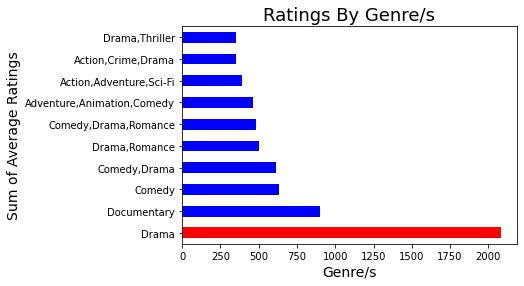

In [19]:
# Make a group for each genre combo and add the average ratings of each genre.
ax = joined_three_df.groupby('genres').sum()['averagerating'].sort_values(
    ascending = False).head(10)
print(ax)

ax.plot(kind = 'barh', color=('r', 'b', 'b','b', 'b', 'b', 'b', 'b', 'b', 'b'))
plt.title('Ratings By Genre/s', fontsize = 18)
plt.xlabel('Genre/s', fontsize = 14)
plt.ylabel('Sum of Average Ratings', fontsize = 14)

## Drama is really high compared to the other genres. Let's see if there's something to be worried about.
**After some investigating I found some duplicate movies that had different genres.**

In [20]:
#Check the dataframe for the duplicates in movie columns
movies = joined_three_df['movie']
joined_three_df[movies.isin(movies[movies.duplicated()])].sort_values('movie')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,profits,roi,month
600,2011-09-16,3,7200000,59774,295492,119.0,"Comedy,Drama,Romance",6.7,4722,-6904508,-196.0,9
1533,2011-09-16,3,7200000,59774,295492,115.0,"Comedy,Drama",6.1,101,-6904508,-196.0,9
1309,2011-09-16,3,7200000,59774,295492,145.0,"Drama,Mystery,Romance",7.2,3471,-6904508,-196.0,9
2547,2011-09-16,3,7200000,59774,295492,80.0,"Horror,Mystery,Thriller",3.9,166,-6904508,-196.0,9
906,2011-09-30,50/50,8000000,35016118,41334735,77.0,Documentary,7.5,11,33334735,317.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1952,2015-12-04,Youth,13000000,2703296,24001573,124.0,"Comedy,Drama,Music",7.3,64418,11001573,-15.0,12
2556,2015-12-04,Youth,13000000,2703296,24001573,124.0,Drama,7.3,11,11001573,-15.0,12
2117,2006-08-11,Zoom,35000000,11989328,12506188,96.0,"Animation,Comedy,Drama",6.1,2323,-22493812,-164.0,8
2581,2006-08-11,Zoom,35000000,11989328,12506188,158.0,"Comedy,Drama,Romance",7.2,85,-22493812,-164.0,8


In [20]:
#drop duplicate rows from this dataframe
joined_three_df.drop_duplicates(subset=['movie'], keep = 'first', inplace=True)

In [21]:
#check to see if there are any duplicates left
joined_three_df.movie.duplicated().any()

False

genres
Drama                         1018.2
Comedy                         473.5
Comedy,Drama                   469.0
Documentary                    463.0
Adventure,Animation,Comedy     429.6
Comedy,Drama,Romance           423.0
Drama,Romance                  368.6
Action,Adventure,Sci-Fi        366.3
Action,Crime,Drama             298.5
Comedy,Romance                 270.6
Name: averagerating, dtype: float64


Text(0, 0.5, 'Sum of Average Ratings')

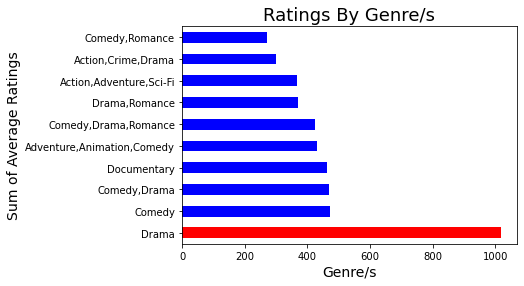

In [24]:
# checking the plot after removing the duplicates
ax1 = joined_three_df.groupby('genres').sum()['averagerating'].sort_values(
    ascending = False).head(10)
print(ax1)

ax1.plot(kind = 'barh', color=('r', 'b', 'b','b', 'b', 'b', 'b', 'b', 'b', 'b'))
plt.title('Ratings By Genre/s', fontsize = 18)
plt.xlabel('Genre/s', fontsize = 14)
plt.ylabel('Sum of Average Ratings', fontsize = 14)

In [23]:
joined_three_df.genres.value_counts()

Drama                         159
Comedy                         81
Comedy,Drama                   73
Adventure,Animation,Comedy     68
Comedy,Drama,Romance           66
                             ... 
Documentary,War                 1
Music                           1
Animation,Drama,Fantasy         1
Animation,Family                1
Adventure,Animation,Drama       1
Name: genres, Length: 284, dtype: int64

## Insights

Drama still has a lot of ratings even after cleaning. You can also find it in other genre combos. Comedy is another genre that appears a few times as well. Now this data can change or be skewed by the number of votes recorded.


## Suggestion:

The best genre to start with is Drama and even though it does well alone, it can be combined with other genres to add to the popularity. We should also consider Comedy as well. Drama and Comedy would be a nice team up according to the plot.


# Profits For Genre
**Before I look at the comparsion of profits by genre. I want to check if there's a positive correlation between popular and revenue. Does higher rating mean higher revenue?**


C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Correlation between revenue and popularity:  0.21382918716840746


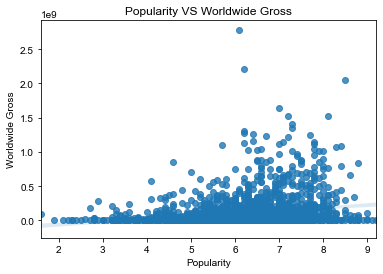

In [25]:
#check the correlation between popular and revenue
ax2 = sns.regplot(x = joined_three_df['averagerating'], y=joined_three_df['worldwide_gross'])
ax2.set_title("Popularity VS Worldwide Gross")
ax2.set_xlabel("Popularity")
ax2.set_ylabel("Worldwide Gross")
sns.set(rc={'figure.figsize':(10,8)})

info_corr = joined_three_df.corr()
print("Correlation between revenue and popularity: ", info_corr.loc['averagerating', 'worldwide_gross'])

### Analysis
So it looks like there is a small, but positive correlation between popularity and revenue. Looking at the graph there's a majority of movies making money that have a rating between 6 and 8. 

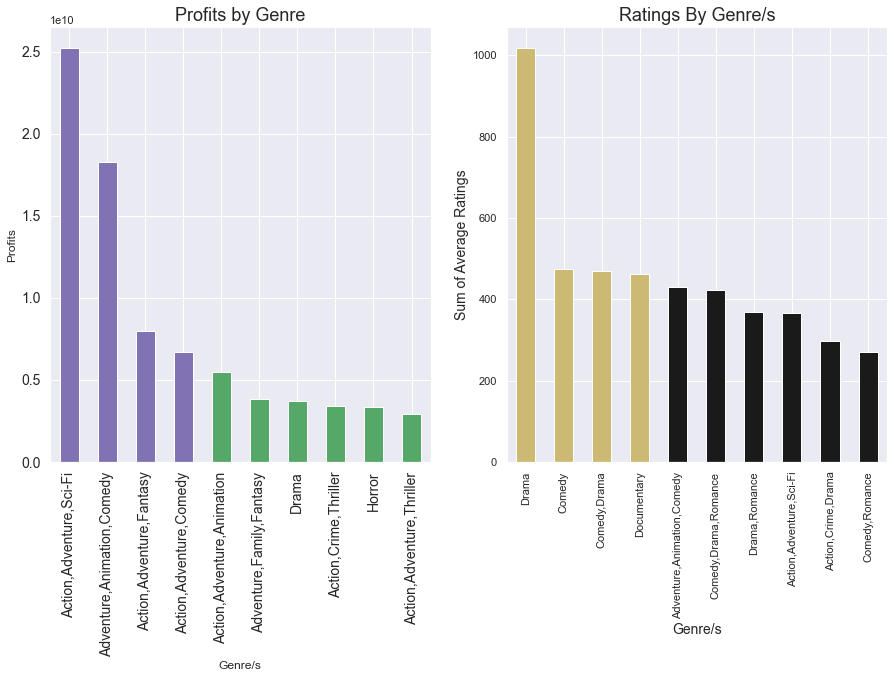

In [26]:
#Plot to compare profits and popularity
plt.figure(figsize =(15,8))
ax3 = joined_three_df.groupby('genres').sum()['profits'].sort_values(
    ascending = False).head(10)
plt.subplot(1,2,1)
ax3.plot(x='genres', y='profits', kind = 'bar', title='Profits by Genre', 
         xlabel='Genre/s', ylabel='Profits', fontsize=14, 
         color=('m', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'g', 'g'))
plt.title('Profits by Genre', fontsize = 18)

ax4 = joined_three_df.groupby('genres').sum()['averagerating'].sort_values(
    ascending = False).head(10)
plt.subplot(1,2,2)
ax4.plot(x='genres', y='averagerating', kind = 'bar', 
         color=('y', 'y', 'y', 'y', 'k', 'k', 'k', 'k', 'k', 'k'))
plt.title('Ratings By Genre/s', fontsize = 18)
plt.xlabel('Genre/s', fontsize = 14)
plt.ylabel('Sum of Average Ratings', fontsize = 14)


plt.show()

## Insights
Look at that. Even though Drama is high in popularity Action/Adventure/Sci-Fi made more money. A lot of things can factor into this. The number of votes recorded per genre, along with the budgets for the movies with these genres, etc. For now I want to continue with the most popular genres. It's a much safer bet to work with.

# Which Popular Genre has the best ROI

**Let's take our top ten popular genres, and find the genres to invest in.**


In [27]:
#create dataframe with the columns I need
popular_genre_roi = joined_three_df.groupby(by='genres' , as_index = False).sum(
).sort_values(by = 'averagerating', ascending = False).head(10).reset_index()
popular_genre_roi

,index,genres,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,profits,roi,month
0,213,Drama,2649589000,3643808495,6383456063,14863.0,1018.2,3098898,3733867063,18539.0,1125
1,138,Comedy,2009401173,2565978749,4516369131,7189.0,473.5,3657556,2506967958,2869.0,531
2,145,"Comedy,Drama",1145339000,1925451261,2993615661,7360.0,469.0,3015754,1848276661,7220.0,506
3,200,Documentary,1039228000,1560362449,2649390768,5268.0,463.0,61580,1610162768,1464.0,433
4,70,"Adventure,Animation,Comedy",6671500000,8782345020,24928663181,6349.0,429.6,6865722,18257163181,11765.0,480
5,153,"Comedy,Drama,Romance",895325000,1377978534,2478236497,6661.0,423.0,4545497,1582911497,7430.0,481
6,245,"Drama,Romance",1050290000,1327986170,3066846101,5866.0,368.6,3215055,2016556101,8717.0,373
7,12,"Action,Adventure,Sci-Fi",9070400000,12588996057,34294902794,7017.0,366.3,21655918,25224502794,9397.0,334
8,31,"Action,Crime,Drama",1151550000,1316623737,2469719275,5236.0,298.5,3891898,1318169275,1827.0,303
9,176,"Comedy,Romance",1088472000,1984007320,3662930110,4767.0,270.6,2834576,2574458110,5350.0,277


Text(0.5, 1.0, 'Sort Genres By ROI')

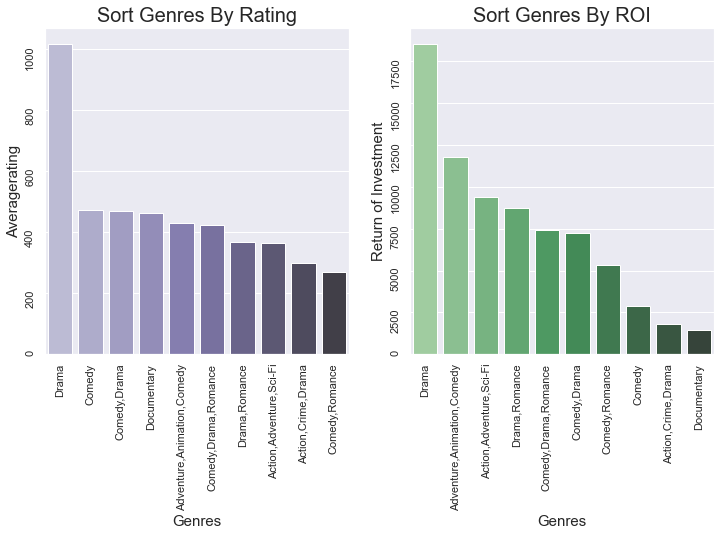

In [28]:
#creating a subplot to plot graphs side-by-side
fig, axes = plt.subplots(1,2, figsize=(12,6))

#plotting of the ten most popular genres
ax5 = sns.barplot(x='genres', y='averagerating', data=popular_genre_roi, ax=axes[0], 
                  palette = 'Purples_d', order = popular_genre_roi.sort_values(
                      'averagerating', ascending = False).genres)
ax5.tick_params(labelrotation=90)
ax5.set_xlabel('Genres', size=15)
ax5.set_ylabel('Averagerating', size=15)
ax5.set_title('Sort Genres By Rating', size=20)

#plotting the return of investments for top ten popular genres
ax6 = sns.barplot(x='genres', y='roi', data=popular_genre_roi, ax=axes[1], 
                  palette = 'Greens_d', order = popular_genre_roi.sort_values(
                      'roi', ascending = False).genres)
ax6.tick_params(labelrotation=90)
plt.xlabel('Genres', size=15)
plt.ylabel('Return of Investment', size=15)
plt.title('Sort Genres By ROI', size=20 )


## Insights

So Drama still seems like the best way to go, being the highest in popularity and in return of investments between the most popular genres. Though it seems that even some of the most popular genres have a lower roi than the least popular.

## Suggestions
Even though Comedy, Comedy/Drama, and Documentary won the popular votes, I think it's best to focus on genres that makes the money. The difference in popularity is very small between the other genres aside from Drama. So for the next question we should focus on the top four genres: 
1. Drama
2. Adventure/Animation/Comedy 
3. Action/Adventure/Sci-Fi 
4. Drama/Romance


# Best Month To Put Out Genre

Let's take our top four genres and see what's the best month to make money. 

In [29]:
#separate columns by each genre
genre_by_month = joined_three_df.groupby(['genres', 'month']).sum()
genre_by_month.head()

production_budget  domestic_gross  worldwide_gross  \
genres month                                                       
Action 2              116700000        23975353        127879753   
       3               60000000        47003582         95538560   
       6               79500000       144908551        352816460   
       9               40000000          463730           463730   
       10              12000000           17484          6553186   

              runtime_minutes  averagerating  numvotes    profits    roi  
genres month                                                              
Action 2                 93.0           18.3       223   11179753 -245.0  
       3                  0.0            3.5        26   35538560  -41.0  
       6                222.0           12.7       566  273316460  288.0  
       9                 47.0            8.0         9  -39536270 -199.0  
       10                 0.0            7.2         8   -5446814 -145.0

In [30]:
#select the top four genre
pop_genre_month = genre_by_month.loc[['Drama', 'Adventure,Animation,Comedy', 
                                      'Action,Adventure,Sci-Fi', 'Drama,Romance']]
pop_genre_month

production_budget  domestic_gross  \
genres                     month                                      
Drama                      1              210427000       200472061   
                           2              196200000       324239002   
                           3              216580000       381882751   
                           4              367925000       261848932   
                           5               47600000        11749777   
                           6              176592000       373215379   
                           7              172385000       395295435   
                           8              243000000       458116760   
                           9              225700000       219889800   
                           10             149150000       179506657   
                           11             176180000       334461923   
                           12             467850000       503130018   
Adventure,Animation,Comedy 1               48000000        81314037   
                           2              234000000       295916215   
                           3              714000000       839714982   
                           4              543000000       527986882   
                           5              210000000       258631451   
                           6             1460000000      2296234379   
                           7              925000000      1874822859   
                           8              196000000       281258973   
                           9              322000000       326554344   
                           10              50000000        50151543   
                           11            1588500000      1546108588   
                           12             381000000       403650767   
Action,Adventure,Sci-Fi    2              549000000       833252295   
                           3             1095000000      1313047530   
                           4              712000000      1137949946   
                           5             2473600000      3452337807   
                           6             2107000000      2497950318   
                           7             1225000000      1510671289   
                           9              126000000        93049843   
                           11             415000000      1043527834   
                           12             367800000       707209195   
Drama,Romance              1               54000000        18472765   
                           2              128700000       270437960   
                           3               49100000        64797461   
                           4              109000000       166059583   
                           5              224500000       189085636   
                           6               78000000       216558751   
                           7               56400000        75664861   
                           8               78950000       104311279   
                           9               36190000        17109575   
                           10              59250000        64918129   
                           11             110000000        75146834   
                           12              66200000        65423336   

                                  worldwide_gross  runtime_minutes  \
genres                     month                                     
Drama                      1            334655890           1271.0   
                           2            545038799            853.0   
                           3            680946758           1143.0   
                           4            554049791           1164.0   
                           5             27869473            576.0   
                           6            654391945            887.0   
                           7            723259807           1247.0   
                           8            600720270           1555.0

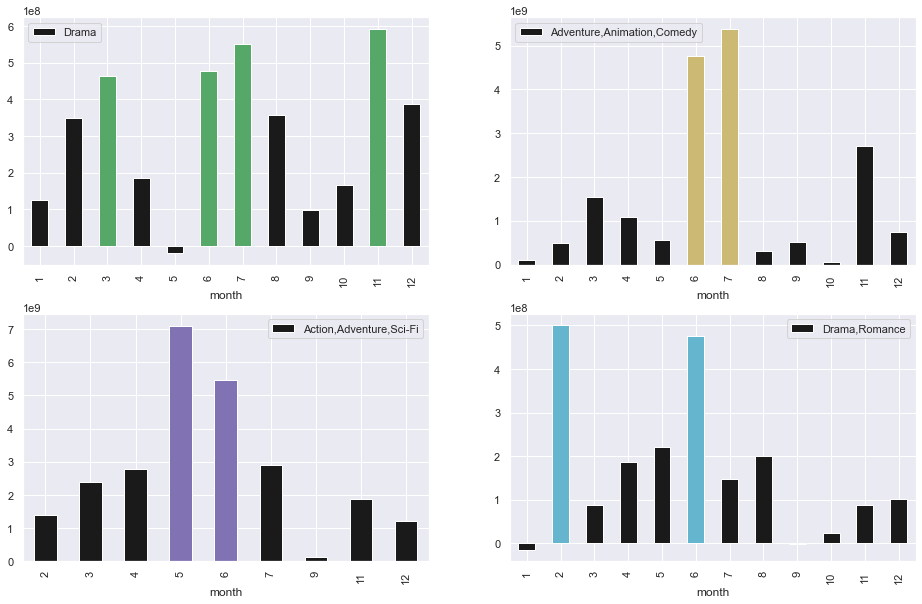

In [31]:
#Create subplots to see profits of each genre per month
f, a = plt.subplots(2,2, figsize=(16,10))

pop_genre_month.loc['Drama', 'profits'].plot(label = "Drama",kind='bar',
                                             legend=True, ax=a[0][0],
                                             color=('k', 'k', 'g', 'k', 'k', 
                                                    'g', 'g', 'k', 'k', 'k', 
                                                    'g', 'k'))
pop_genre_month.loc['Adventure,Animation,Comedy', 'profits'].plot(
    label = "Adventure,Animation,Comedy",kind='bar',legend=True, ax=a[0][1], 
    color=('k', 'k', 'k', 'k', 'k', 'y', 'y', 'k', 'k', 'k', 'k', 'k'))
pop_genre_month.loc['Action,Adventure,Sci-Fi', 'profits'].plot(
    label = "Action,Adventure,Sci-Fi",kind='bar',legend=True, ax=a[1][0], 
    color=('k', 'k', 'k', 'm', 'm', 'k', 'k', 'k', 'k', 'k', 'k', 'k'))
pop_genre_month.loc['Drama,Romance', 'profits'].plot(
    label = 'Drama,Romance',kind='bar', legend=True, ax=a[1][1], 
    color=('k', 'c', 'k', 'k', 'k', 'c', 'k', 'k', 'k', 'k', 'k', 'k'))

plt.show()

## Insights
All around these genres look promising in the month of June. The highest for each genre:
        Drama in November
        Adventure/Animation/Comedy in July
        Action/Adventure/Sci-Fi in May
        Drama/Romance in February(shocker, right?)

## Suggestions
1. Drama movies will be great for June, July, and November.
2. Adventure,Animation,Comedy will be great for June/July releases.
3. Action,Adventure,Sci-Fi will be great for May/June releases.
4. Drama,Romance will be great for February/June releases.
